In [1]:
%matplotlib inline 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.model_selection import train_test_split

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from process_data import process_data
from process_data import get_date_range

In [5]:
price_frame = process_data()
price_frame.head()

,lmp_value,time,hour,day,month,summary,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,visibility
0,30.56196,2016-01-01 07:00:00,7,4,1,5,0.0,0.0,36.78,33.10,32.47,0.84,1020.18,4.53,111.0,0.00,9.69
1,32.26382,2016-01-01 08:00:00,8,4,1,5,0.0,0.0,39.36,34.56,33.89,0.81,1020.67,6.69,112.0,0.00,9.59
2,30.84944,2016-01-01 09:00:00,9,4,1,5,0.0,0.0,46.70,43.65,35.51,0.65,1021.00,6.16,119.0,0.01,9.61
3,30.71027,2016-01-01 10:00:00,10,4,1,5,0.0,0.0,52.42,52.42,35.37,0.52,1021.58,3.27,105.0,0.00,9.80
4,28.87975,2016-01-01 11:00:00,11,4,1,5,0.0,0.0,55.66,55.66,37.79,0.51,1021.44,1.78,339.0,0.17,9.92


In [4]:
df_price_frame = price_frame.set_index("time")
df_price_frame.head()

,lmp_value,hour,day,month,summary,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,visibility
time,,,,,,,,,,,,,,,,
2016-01-01 07:00:00,30.56196,7,4,1,5,0.0,0.0,36.78,33.10,32.47,0.84,1020.18,4.53,111.0,0.00,9.69
2016-01-01 08:00:00,32.26382,8,4,1,5,0.0,0.0,39.36,34.56,33.89,0.81,1020.67,6.69,112.0,0.00,9.59
2016-01-01 09:00:00,30.84944,9,4,1,5,0.0,0.0,46.70,43.65,35.51,0.65,1021.00,6.16,119.0,0.01,9.61
2016-01-01 10:00:00,30.71027,10,4,1,5,0.0,0.0,52.42,52.42,35.37,0.52,1021.58,3.27,105.0,0.00,9.80
2016-01-01 11:00:00,28.87975,11,4,1,5,0.0,0.0,55.66,55.66,37.79,0.51,1021.44,1.78,339.0,0.17,9.92


In [6]:
x_train, y_train, x_test, y_test = get_date_range(df_price_frame, '2016-01-01', '2016-03-01', '2016-03-01', '2016-03-05')

   hour  day  month  summary  precipIntensity  precipProbability  temperature  \
0     7    4      1        5              0.0                0.0        36.78   
1     8    4      1        5              0.0                0.0        39.36   
2     9    4      1        5              0.0                0.0        46.70   
3    10    4      1        5              0.0                0.0        52.42   
4    11    4      1        5              0.0                0.0        55.66   

   apparentTemperature  dewPoint  humidity  pressure  windSpeed  windBearing  \
0                33.10     32.47      0.84   1020.18       4.53        111.0   
1                34.56     33.89      0.81   1020.67       6.69        112.0   
2                43.65     35.51      0.65   1021.00       6.16        119.0   
3                52.42     35.37      0.52   1021.58       3.27        105.0   
4                55.66     37.79      0.51   1021.44       1.78        339.0   

   cloudCover  visibility  
0   

In [15]:
gamma_range = [0.01, 0.001, 0.0001, 0.00001]
epsilon_range = [x * 0.1 for x in range(0, 1)]
C_range = range(1, 500, 100)
tuned_parameters = [{
    'kernel': ['rbf'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range,
    }]

svr_price = GridSearchCV(SVR(), param_grid=tuned_parameters, verbose=0)
y_pred = svr_price.fit(x_train, y_train).predict(x_test)

print 'Optimum parameters epsilon and kernel for SVR: ', svr_price.best_params_

print "The test score R2 for SVR: ", svr_price.score(x_test, y_test)

print("SVR mean squared error: %.2f"
      % np.mean((y_test - svr_price.predict(x_test)) ** 2))

Optimum parameters epsilon and kernel for SVR:  {'epsilon': 0.0, 'C': 401, 'gamma': 0.0001, 'kernel': 'rbf'}
The test score R2 for SVR:  0.238428609372
SVR mean squared error: 30.81


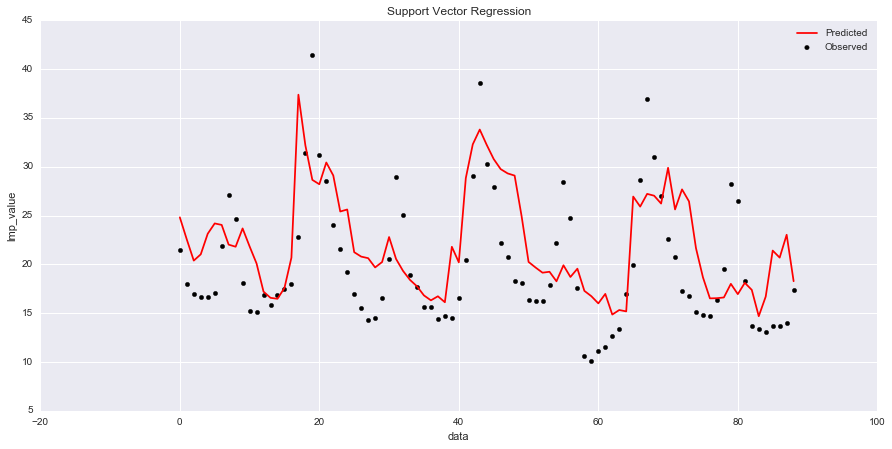

In [12]:
fig = plt.figure(figsize=(15,7))
plt.scatter(x_test.index, y_test, c='k', label='Observed')
plt.plot(x_test.index, y_pred, c='r', label='Predicted')
plt.xlabel('data')
plt.ylabel('lmp_value')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

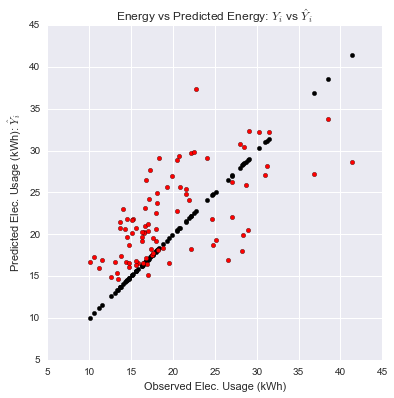

In [13]:
fig = plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test, c='k')
plt.scatter(y_test, y_pred, c='r')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$")